In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\meteorite-landings.csv.zip")

# Head

In [3]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


# Changing col names

In [4]:
df.columns = df.columns.str.lower()
df = df.rename(columns = {'mass' : 'mass_g', 'geolocation' : 'geo_location'})
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass_g', 'fall', 'year',
       'reclat', 'reclong', 'geo_location'],
      dtype='object')

# Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          45716 non-null  object 
 1   id            45716 non-null  int64  
 2   nametype      45716 non-null  object 
 3   recclass      45716 non-null  object 
 4   mass_g        45585 non-null  float64
 5   fall          45716 non-null  object 
 6   year          45428 non-null  float64
 7   reclat        38401 non-null  float64
 8   reclong       38401 non-null  float64
 9   geo_location  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


# Changing Data Type of fall to integer year


In [6]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['year'])
df = df.astype({'year' : 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45428 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          45428 non-null  object 
 1   id            45428 non-null  int64  
 2   nametype      45428 non-null  object 
 3   recclass      45428 non-null  object 
 4   mass_g        45311 non-null  float64
 5   fall          45428 non-null  object 
 6   year          45428 non-null  int32  
 7   reclat        38226 non-null  float64
 8   reclong       38226 non-null  float64
 9   geo_location  38226 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 3.6+ MB


# Describe

In [7]:
pd.set_option('display.float_format', '{:.6f}'.format)
df.describe()

,id,mass_g,year,reclat,reclong
count,45428.000000,45311.000000,45428.000000,38226.000000,38226.000000
mean,26804.870212,13314.680535,1991.772189,-39.378790,61.196212
std,16832.431533,576714.054648,27.181247,46.317605,80.756809
min,1.000000,0.000000,301.000000,-87.366670,-165.433330
25%,12642.750000,7.120000,1987.000000,-76.716670,0.000000
50%,24162.500000,32.100000,1998.000000,-71.500000,35.666670
75%,40550.250000,200.000000,2003.000000,0.000000,157.166670
max,57458.000000,60000000.000000,2501.000000,81.166670,354.473330


# Checking unique values

In [8]:
obj_col = list(df.select_dtypes('object').columns)
obj_col.append('year')

for col in obj_col:
    print(f"Col Name : {col}")
    print(df[col].unique())
    print(df[col].value_counts())
    print()

Col Name : name
['Aachen' 'Aarhus' 'Abee' ... 'Zlin' 'Zubkovsky' 'Zulu Queen']
name
Aachen                    1
Northwest Africa 751      1
Northwest Africa 7532     1
Northwest Africa 7533     1
Northwest Africa 7534     1
                         ..
Grove Mountains 052079    1
Grove Mountains 052080    1
Grove Mountains 052081    1
Grove Mountains 052082    1
Zulu Queen                1
Name: count, Length: 45428, dtype: int64

Col Name : nametype
['Valid' 'Relict']
nametype
Valid     45354
Relict       74
Name: count, dtype: int64

Col Name : recclass
['L5' 'H6' 'EH4' 'Acapulcoite' 'L6' 'LL3-6' 'H5' 'L' 'Diogenite-pm'
 'Unknown' 'H4' 'H' 'Iron, IVA' 'CR2-an' 'LL5' 'CI1' 'L/LL4'
 'Eucrite-mmict' 'CV3' 'Ureilite-an' 'Stone-uncl' 'L3' 'Angrite' 'LL6'
 'L4' 'Aubrite' 'Iron, IIAB' 'Iron, IAB-sLL' 'Iron, ungrouped' 'CM2' 'OC'
 'Mesosiderite-A1' 'LL4' 'C2-ung' 'LL3.8' 'Howardite' 'Eucrite-pmict'
 'Diogenite' 'LL3.15' 'LL3.9' 'Iron, IAB-MG' 'H/L3.9' 'Iron?' 'Eucrite'
 'H4-an' 'L/LL6' 'Iron,

# Check for null values

In [9]:
np.sum(df.isna(), axis = 0)

name               0
id                 0
nametype           0
recclass           0
mass_g           117
fall               0
year               0
reclat          7202
reclong         7202
geo_location    7202
dtype: int64

In [10]:
df = df.dropna(subset = 'mass_g')

In [11]:
np.sum(df.isna(), axis = 0)

name               0
id                 0
nametype           0
recclass           0
mass_g             0
fall               0
year               0
reclat          7195
reclong         7195
geo_location    7195
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45311 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          45311 non-null  object 
 1   id            45311 non-null  int64  
 2   nametype      45311 non-null  object 
 3   recclass      45311 non-null  object 
 4   mass_g        45311 non-null  float64
 5   fall          45311 non-null  object 
 6   year          45311 non-null  int32  
 7   reclat        38116 non-null  float64
 8   reclong       38116 non-null  float64
 9   geo_location  38116 non-null  object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 3.6+ MB


# Check for duplicated values

In [13]:
np.sum(df.duplicated(), axis = 0)

0

# Histogram of distribution of different numerical columns

In [14]:
num_col = df.select_dtypes('number').columns
num_col

Index(['id', 'mass_g', 'year', 'reclat', 'reclong'], dtype='object')

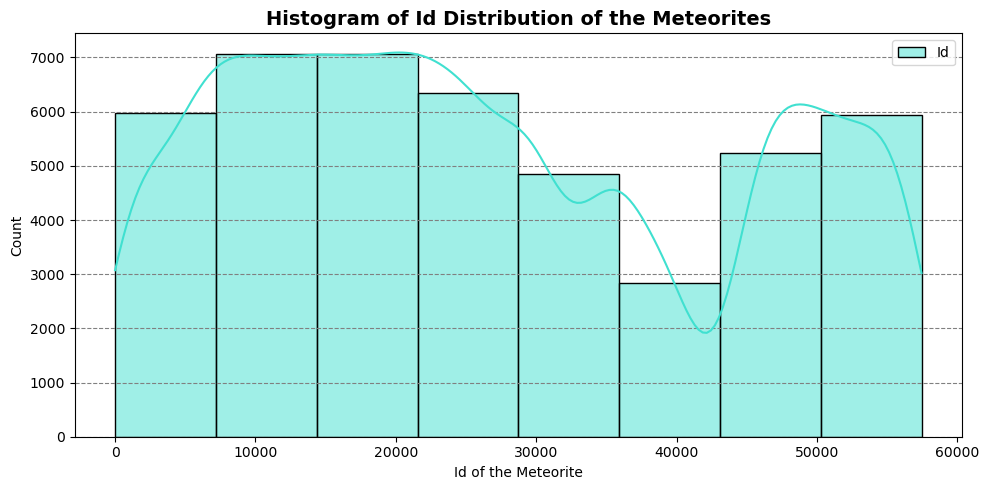

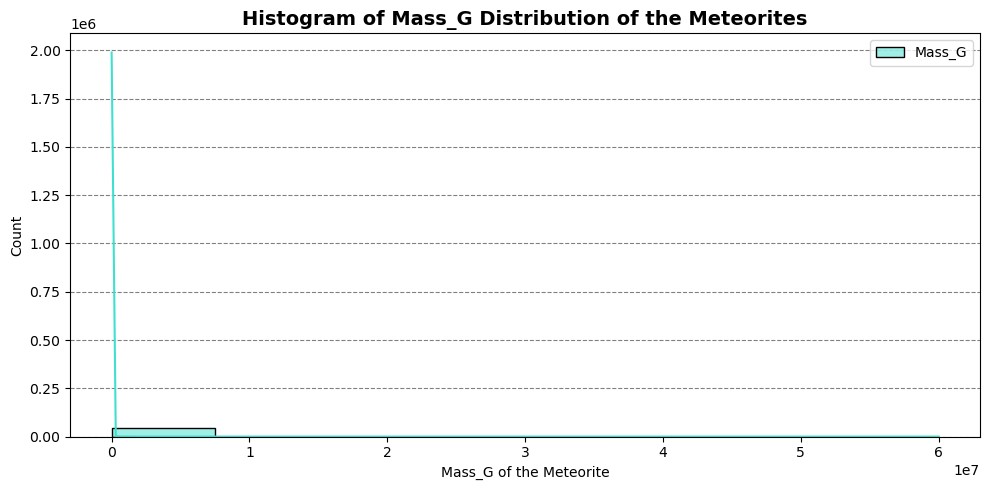

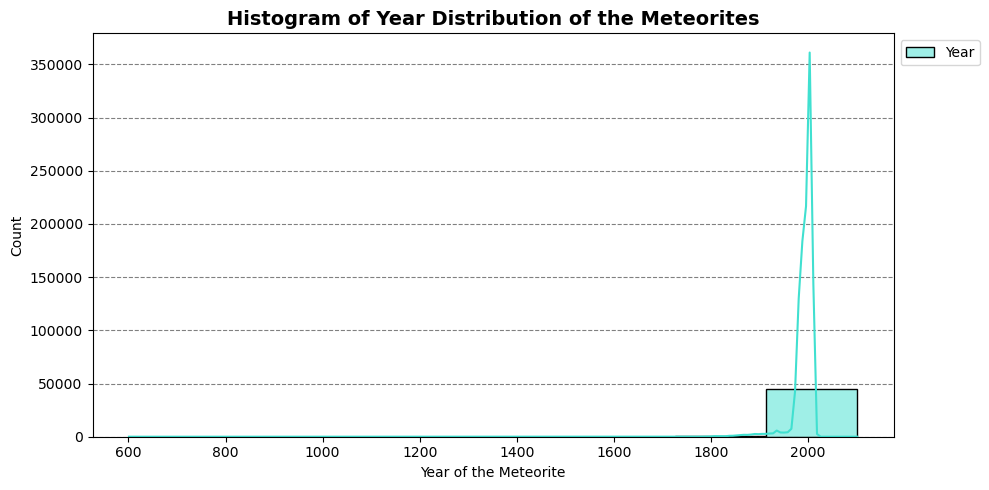

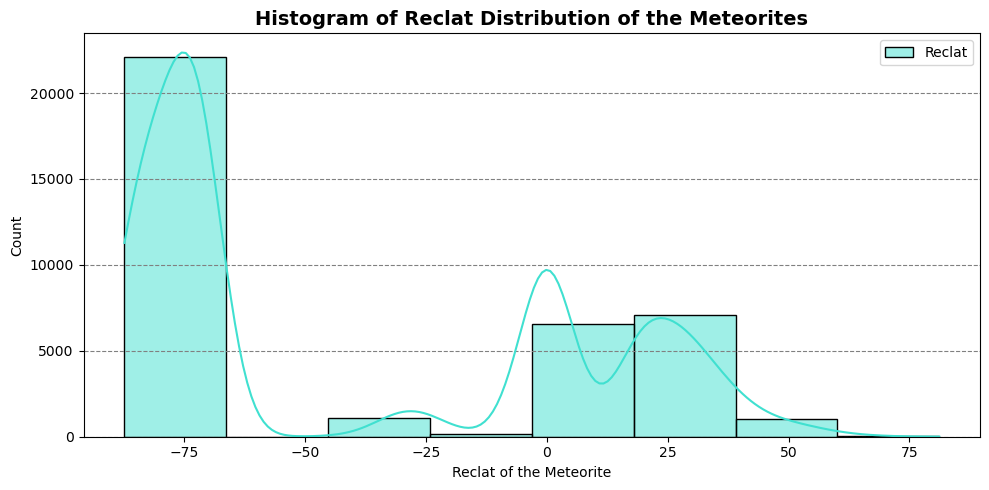

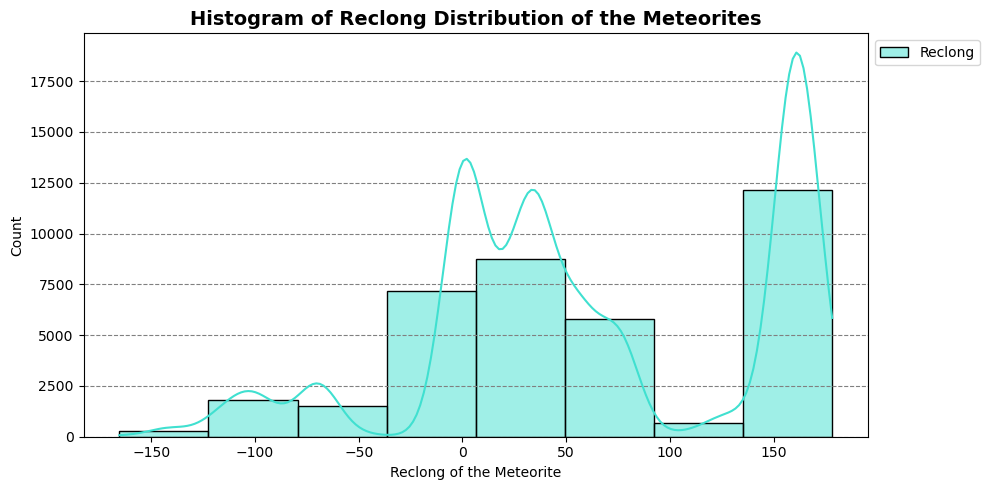

In [15]:
for col in num_col:
    plt.figure(figsize = (10, 5))
    sns.histplot(x = col, data = df, bins = 8, color = 'turquoise', label = col.title(), edgecolor = 'black', kde = True)
    plt.title(f"Histogram of {col.title()} Distribution of the Meteorites", fontsize = 14, fontweight = 'bold')
    plt.xlabel(f"{col.title()} of the Meteorite")
    plt.legend(bbox_to_anchor = (1, 1))
    plt.grid(axis = 'y', linestyle = '--', color = 'gray')
    plt.tight_layout()
    plt.show()

# Scatterplot of Reclong and Reclat with dif hues

In [16]:
cols = ['nametype', 'fall']

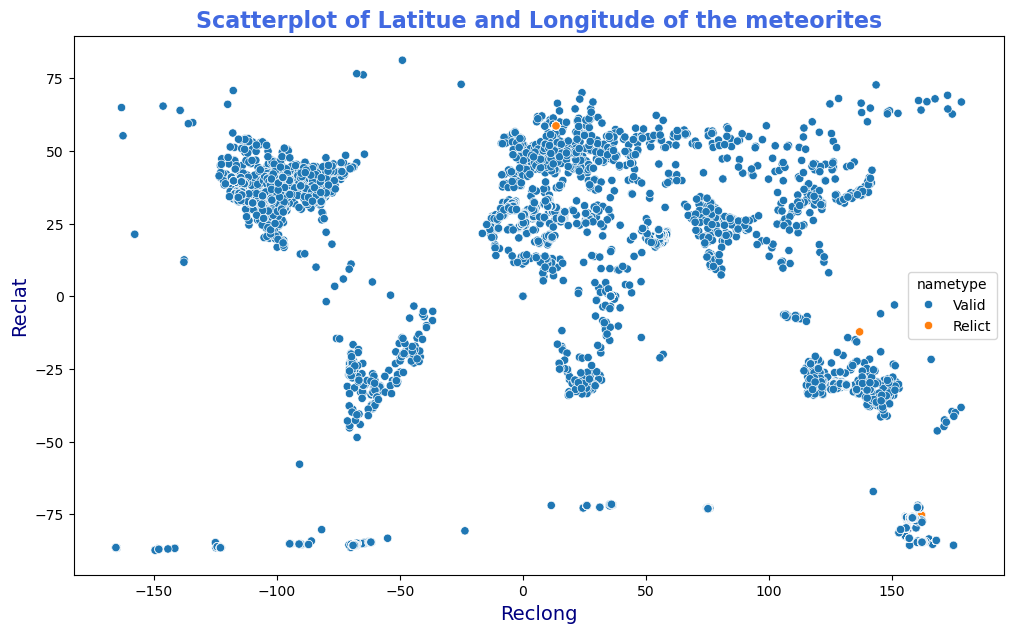

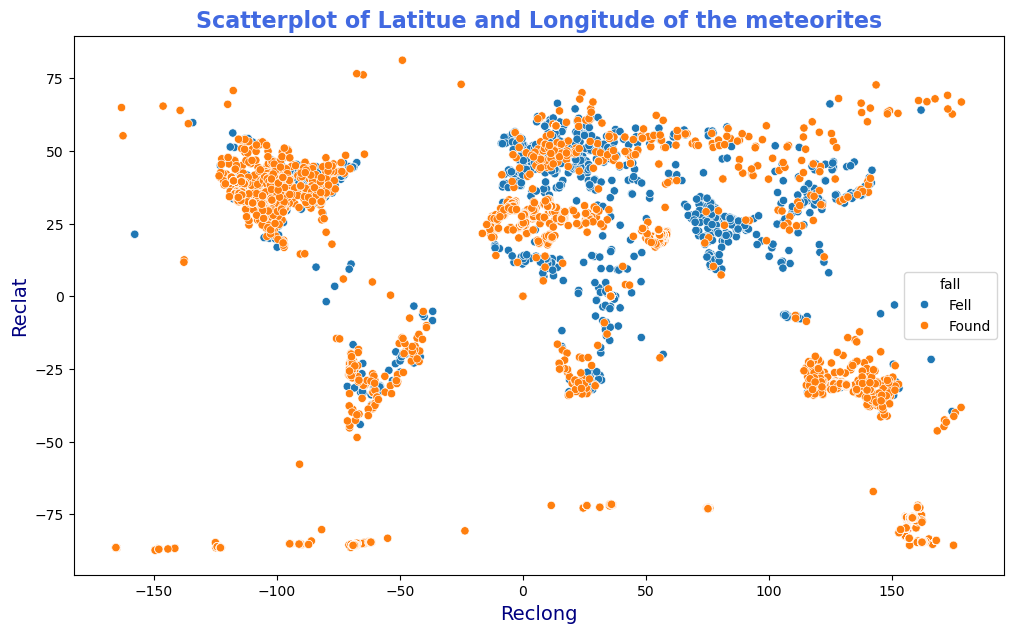

In [17]:
for col in cols:
    plt.figure(figsize = (12, 7))
    sns.scatterplot(y = 'reclat', x = 'reclong', data = df, hue = col)
    plt.title("Scatterplot of Latitue and Longitude of the meteorites", fontsize = 16, fontweight = 'bold', color = 'royalblue')
    plt.ylabel("Reclat", color = 'navy', fontsize = 14)
    plt.xlabel("Reclong", color = 'navy', fontsize = 14)
    plt.show()

# Getting top 10 meteorites with highest mass(in g)

In [18]:
mass_df = df.groupby(['name', 'year'], as_index = False)['mass_g'].mean()
mass_df_10 = mass_df.nlargest(10, 'mass_g')
mass_df_10.index = np.arange(1, 11)
mass_df_10

,name,year,mass_g
1,Hoba,1920,60000000.000000
2,Cape York,1818,58200000.000000
3,Campo del Cielo,1575,50000000.000000
4,Canyon Diablo,1891,30000000.000000
5,Armanty,1898,28000000.000000
6,Gibeon,1836,26000000.000000
7,Chupaderos,1852,24300000.000000
8,Mundrabilla,1911,24000000.000000
9,Sikhote-Alin,1947,23000000.000000
10,Bacubirito,1863,22000000.000000


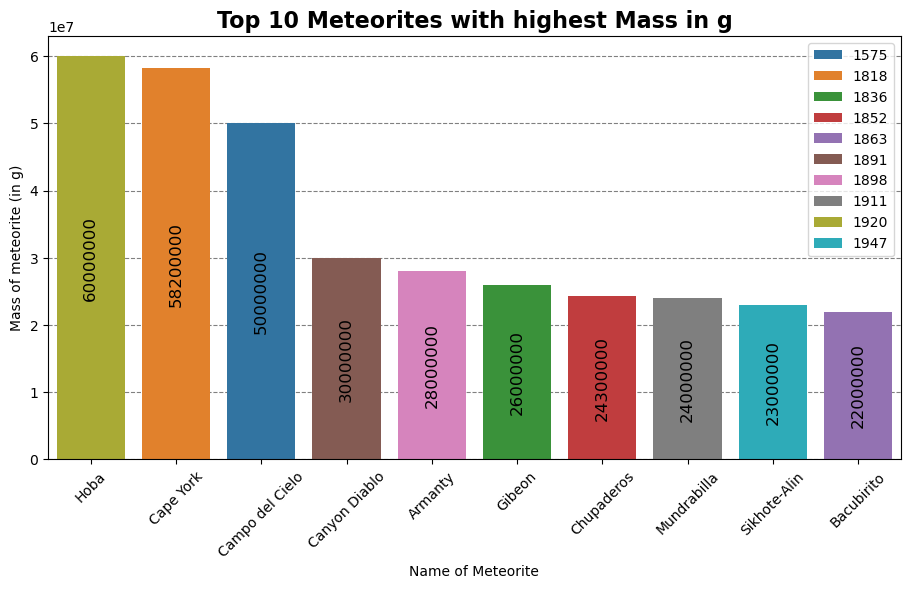

In [25]:
plt.figure(figsize = (11, 5.5))
ax = sns.barplot(x = 'name', y = 'mass_g', data = mass_df_10, hue = 'year', palette = 'tab10')
plt.title("Top 10 Meteorites with highest Mass in g", fontsize = 16, fontweight = 'bold')
plt.xlabel("Name of Meteorite")
plt.ylabel("Mass of meteorite (in g)")
ax.legend(bbox_to_anchor = (1, 1))
plt.xticks(rotation = 45)
plt.grid(axis = 'y', color = 'gray', linestyle = '--')
ax.set_axisbelow(True)
for container in ax.containers:
    ax.bar_label(container, color = 'black', fontsize = 12, rotation = 90, label_type = 'center', fmt = '%.0f')
plt.show()

# Grouping by recclass to draw insights

In [26]:
dfclass = df.groupby('recclass').agg({'recclass' : 'size', 'mass_g' : 'mean'})
dfclass = dfclass.rename(columns = {'recclass' : 'recclass_count'}) 
dfclass.reset_index(inplace = True)
dfclass

,recclass,recclass_count,mass_g
0,Acapulcoite,53,427.526755
1,Acapulcoite/Lodranite,6,31.793333
2,Acapulcoite/lodranite,2,2.400000
3,Achondrite-prim,9,1078.000000
4,Achondrite-ung,56,762.075000
...,...,...,...
454,Stone-ung,1,0.630000
455,Ureilite,300,490.014900
456,Ureilite-an,4,1287.125000
457,Ureilite-pmict,23,262.685652


In [27]:
top10_class = dfclass.nlargest(10, 'recclass_count')
top10_class.index = np.arange(1, 11)
top10_class

,recclass,recclass_count,mass_g
1,L6,8234,1451.683183
2,H5,7102,2156.986833
3,L5,4755,1797.516522
4,H6,4516,863.165668
5,H4,4185,1000.232814
6,LL5,2761,464.760339
7,LL6,2037,693.149054
8,L4,1216,1644.211622
9,H4/5,425,1611.330788
10,CM2,413,369.065765


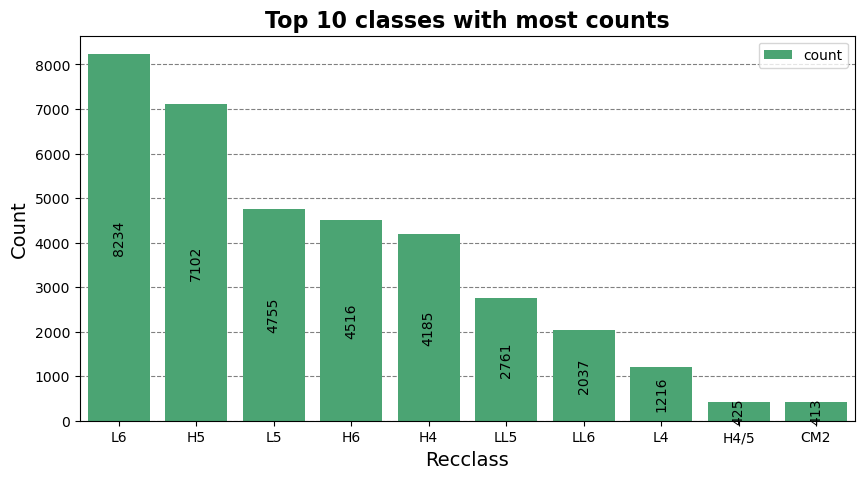

In [28]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(x = 'recclass', y = 'recclass_count', data = top10_class, color = 'mediumseagreen', label = 'count')
plt.title("Top 10 classes with most counts", fontsize = 16, fontweight = 'bold')
plt.xlabel("Recclass", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
ax.bar_label(ax.containers[0], color = 'black', fmt = '%.0f', label_type = 'center', rotation = 90)
ax.set_axisbelow(True)
ax.legend(bbox_to_anchor = (1, 1))
plt.grid(axis = 'y', linestyle = '--', color = 'gray')
plt.show()

# Getting top 10 years with most meteorite falls

In [29]:
df_year = df.groupby(['year'], as_index = False).size()

In [30]:
df_year_top10 = df_year.nlargest(10, 'size')
df_year_top10.index = np.arange(1, 11)
df_year_top10

,year,size
1,2003,3323
2,1979,3045
3,1998,2693
4,2006,2455
5,1988,2296
6,2002,2073
7,2004,1940
8,2000,1781
9,1997,1691
10,1999,1687


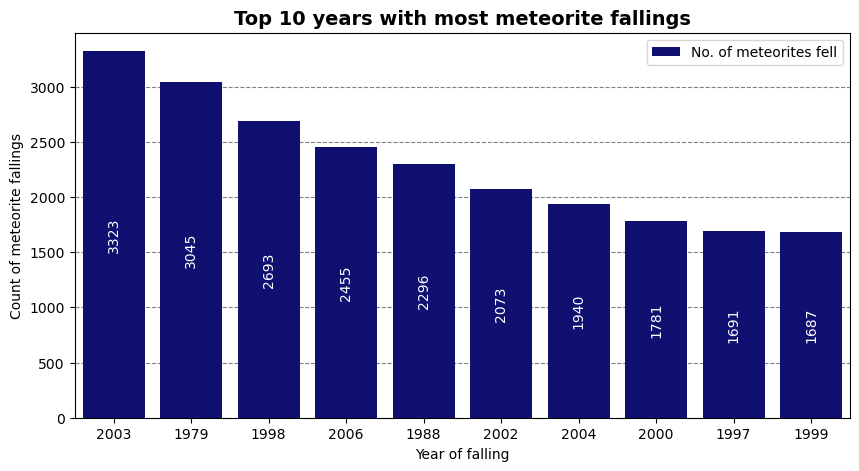

In [31]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(x = 'year', y = 'size', data = df_year_top10, color = 'navy', label = 'No. of meteorites fell', order = df_year_top10['year'])
plt.title("Top 10 years with most meteorite fallings", fontsize = 14, fontweight = 'bold')
plt.xlabel('Year of falling')
plt.ylabel("Count of meteorite fallings")
ax.legend(bbox_to_anchor = (1, 1))
ax.set_axisbelow(True)
ax.bar_label(ax.containers[0], fmt = '%.0f', color = 'white', rotation = 90, label_type = 'center')
plt.grid(axis = 'y', linestyle = '--', color = 'gray')
plt.show()

# Pie chart of nametype distribution

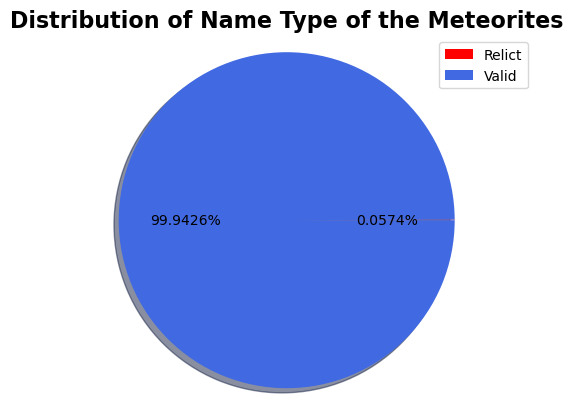

In [32]:
nametype_df = df.groupby('nametype', as_index = False).size()
plt.pie(nametype_df['size'], colors = ['red', 'royalblue'], autopct = '%.4f%%', shadow = True)
plt.title("Distribution of Name Type of the Meteorites", fontsize = 16, fontweight = 'bold')
plt.axis('equal')
plt.legend(nametype_df['nametype'])
plt.show()

# Pie chart of Fall data 

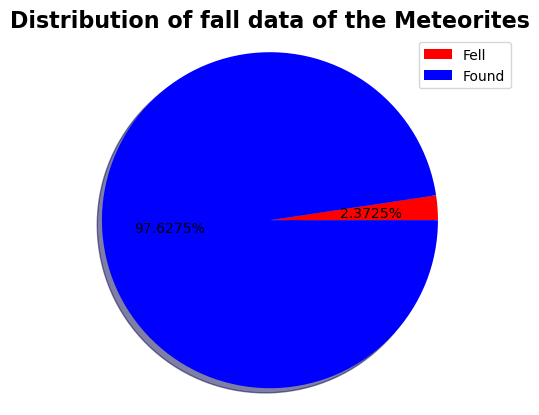

In [33]:
fall_df = df.groupby('fall', as_index = False).size()
plt.pie(fall_df['size'], colors = ['red', 'blue'], autopct = '%.4f%%', shadow = True)
plt.title("Distribution of fall data of the Meteorites", fontsize = 16, fontweight = 'bold')
plt.axis('equal')
plt.legend(fall_df['fall'])
plt.show()

# Heatmap of Correlation

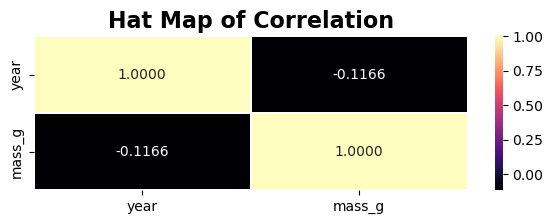

In [34]:
df_corr = df[['year', 'mass_g']].corr()

plt.figure(figsize = (7, 2))
sns.heatmap(df_corr, cmap = 'magma', fmt = '.4f', annot = True, edgecolor = 'white', linewidth = 1.3)
plt.title("Hat Map of Correlation", fontsize = 16, fontweight = 'bold')
plt.show()